<a href="https://colab.research.google.com/github/nagapavanireddy/projects/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Import Dataset


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nagulanchisrivarsha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:23<00:00, 105MB/s]


In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np # linear algebra
import pandas as pd #
from collections import defaultdict


In [ ]:
import os
import cv2
import numpy as np

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    return np.array(data)


error

In [ ]:
import os
import cv2
from tqdm import tqdm
from collections import defaultdict

# Define labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    image_counts = defaultdict(int)
    valid_extensions = ('.jpg', '.jpeg', '.png')

    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(f"\n🟡 Loading images for class: {label}")

        for img_name in tqdm(os.listdir(path), desc=f"{label}", unit="img"):
            if not img_name.lower().endswith(valid_extensions):
                continue

            img_path = os.path.join(path, img_name)
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img_arr is None:
                print(f"❌ Failed to load image: {img_path}")
                continue

            try:
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
                image_counts[label] += 1
            except Exception as e:
                print(f"⚠️ Error resizing image {img_path}: {e}")
                continue

    print("\n📊 Image loading summary:")
    for label in labels:
        print(f"{label}: {image_counts[label]} images loaded")

    return data


In [ ]:
train = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('chest-xray-pneumonia/chest_xray/chest_xray/val')


🟡 Loading images for class: PNEUMONIA


PNEUMONIA: 100%|██████████| 3876/3876 [00:19<00:00, 195.00img/s]



🟡 Loading images for class: NORMAL


NORMAL: 100%|██████████| 1342/1342 [00:16<00:00, 81.72img/s]



📊 Image loading summary:
PNEUMONIA: 3875 images loaded
NORMAL: 1341 images loaded

🟡 Loading images for class: PNEUMONIA


PNEUMONIA: 100%|██████████| 390/390 [00:01<00:00, 315.64img/s]



🟡 Loading images for class: NORMAL


NORMAL: 100%|██████████| 234/234 [00:01<00:00, 131.53img/s]



📊 Image loading summary:
PNEUMONIA: 390 images loaded
NORMAL: 234 images loaded

🟡 Loading images for class: PNEUMONIA


PNEUMONIA: 100%|██████████| 9/9 [00:00<00:00, 436.06img/s]



🟡 Loading images for class: NORMAL


NORMAL: 100%|██████████| 9/9 [00:00<00:00, 181.57img/s]


📊 Image loading summary:
PNEUMONIA: 8 images loaded
NORMAL: 8 images loaded


/tmp/ipython-input-2140971981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=label_counts, palette='viridis')


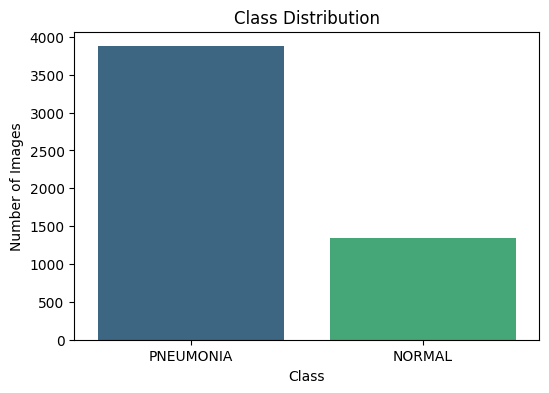

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(data, labels):
    label_counts = [0] * len(labels)
    for _, label in data:
        label_counts[label] += 1

    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=label_counts, palette='viridis')
    plt.title("Class Distribution")
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    plt.show()

# Example usage
plot_class_distribution(train, labels)


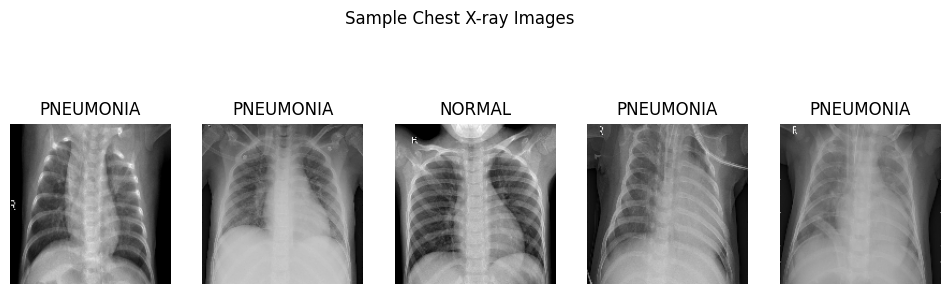

In [ ]:
import random
import matplotlib.pyplot as plt

def show_sample_images(data, labels, num_samples=5):
    plt.figure(figsize=(12, 4))
    samples = random.sample(data, num_samples)

    for i, (img, label) in enumerate(samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(labels[label])
        plt.axis('off')

    plt.suptitle("Sample Chest X-ray Images")
    plt.show()

# Example usage
show_sample_images(train, labels)



In [ ]:
def split_features_labels(data):
    X = np.array([item[0] for item in data]).reshape(-1, img_size, img_size, 1)
    y = np.array([item[1] for item in data])
    return X, y

# Apply to each dataset
X_train, y_train = split_features_labels(train)
X_test, y_test = split_features_labels(test)
X_val, y_val = split_features_labels(val)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0


In [ ]:
# Reshape grayscale images for CNN input
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_val   = X_val.reshape(-1, img_size, img_size, 1)
X_test  = X_test.reshape(-1, img_size, img_size, 1)

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val   = to_categorical(y_val, num_classes=2)
y_test  = to_categorical(y_test, num_classes=2)


Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# datagen.fit(X_train) # This line is not needed when using flow

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 2 , activation = 'softmax')) # Changed to 2 units and softmax activation
model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy']) # Changed loss to categorical_crossentropy
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,530 (4.76 MB)

 Trainable params: 1,245,442 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Watch validation accuracy
    patience=2,              # Wait 2 epochs before reducing LR
    verbose=1,               # Print updates
    factor=0.3,              # Reduce LR by 30%
    min_lr=1e-6              # Don't go below this LR
)


In [ ]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.7904 - loss: 1.6682 - val_accuracy: 0.5000 - val_loss: 20.5401 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.8870 - loss: 0.2753 - val_accuracy: 0.5000 - val_loss: 59.2880 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9079 - loss: 0.2252
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9079 - loss: 0.2252 - val_accuracy: 0.5000 - val_loss: 36.6815 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9491 - loss: 0.1561 - val_accuracy: 0.5625 - val_loss: 1.6302 - learning_rate: 3.0000e-04
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9518 - loss: 0.1486 - val_accuracy: 0.5000 - val_loss: 1.6155 - learning_rate: 3.0000e-04
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9535 - los

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9175 - loss: 0.2590
Loss of the model is -  0.36459600925445557
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9175 - loss: 0.2590
Accuracy of the model is -  90.54487347602844 %


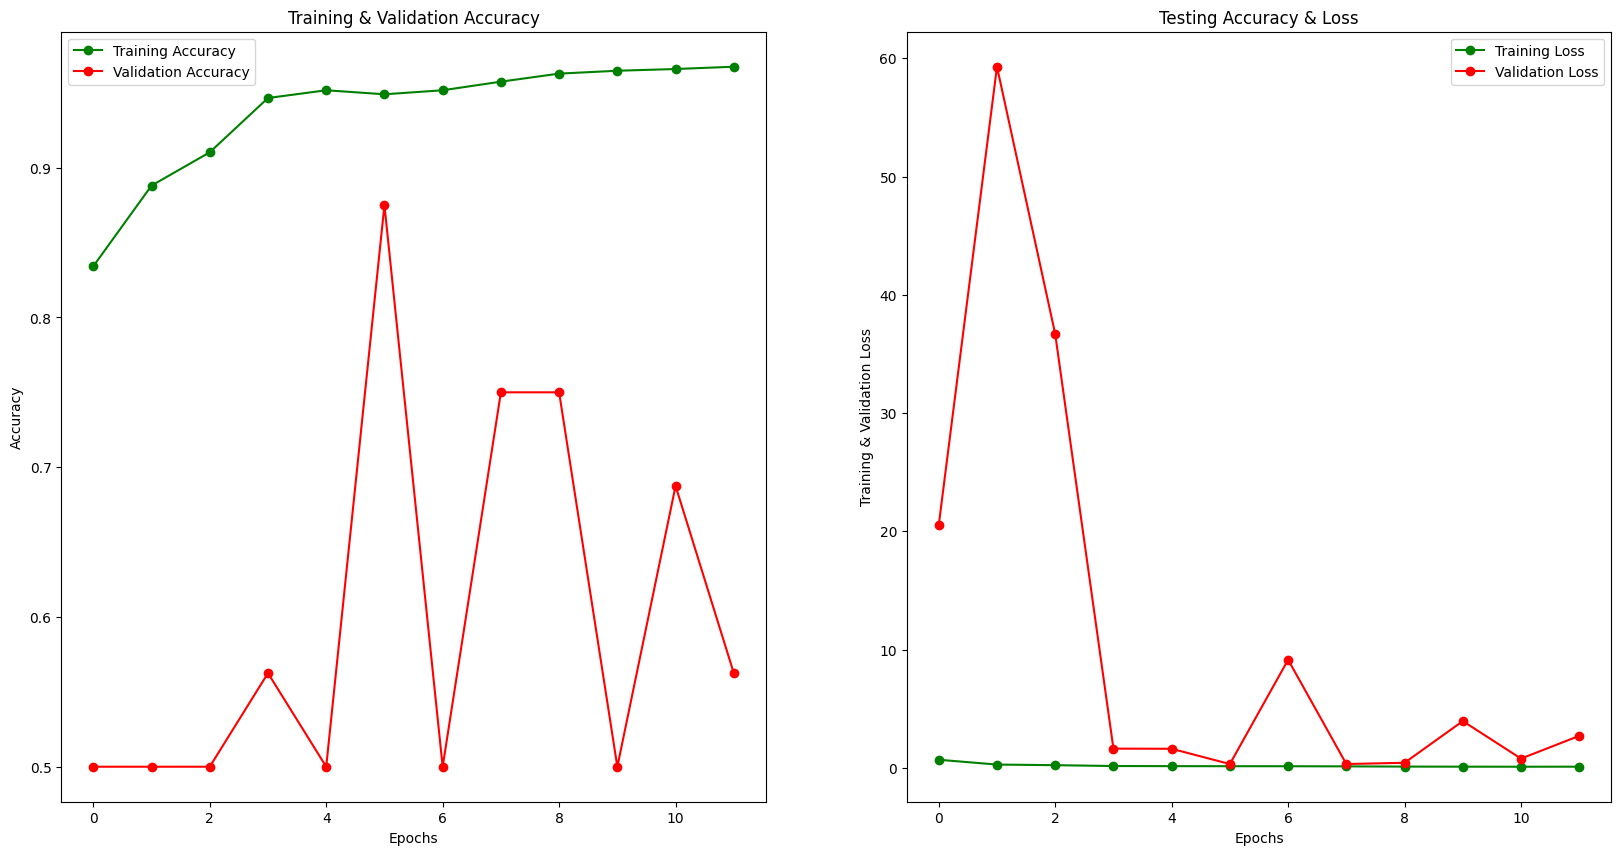

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Convert y_test back to binary format
y_test_binary = np.argmax(y_test, axis=1)

print(classification_report(y_test_binary, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.93      0.92       390
   Normal (Class 1)       0.88      0.86      0.87       234

           accuracy                           0.91       624
          macro avg       0.90      0.90      0.90       624
       weighted avg       0.91      0.91      0.91       624



In [ ]:
# Convert y_test back to binary format for confusion matrix
y_test_binary = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_binary, predictions)
cm

array([[363,  27],
       [ 32, 202]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

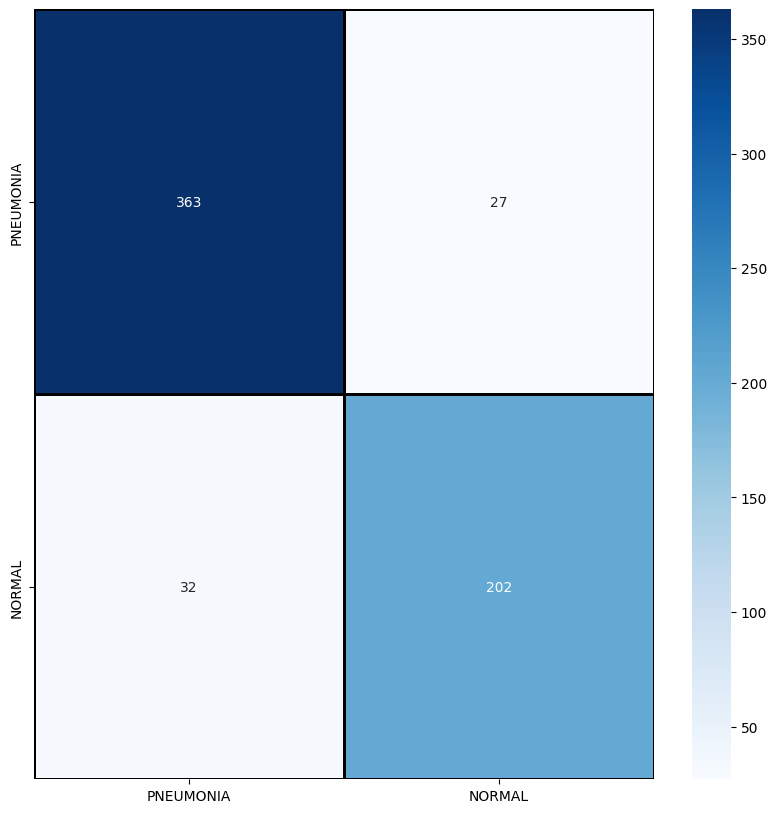

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == np.argmax(y_test, axis=1))[0]
incorrect = np.nonzero(predictions != np.argmax(y_test, axis=1))[0]

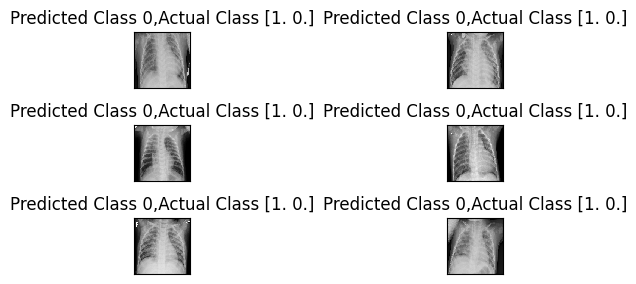

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

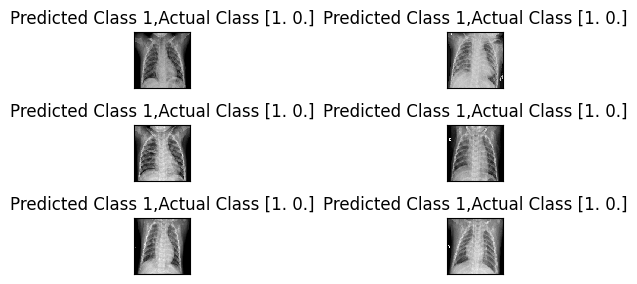

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import cv2 # Import cv2 for grayscale conversion

model.save("pneumonia_model.h5")

model=load_model("pneumonia_model.h5")

img_path=input("Enter path for chest X-ray image:")

# Load image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (150, 150)) # Resize the image
img_array = np.array(img) / 255.0 # Normalize pixel values
img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

Enter path for chest X-ray image:/content/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


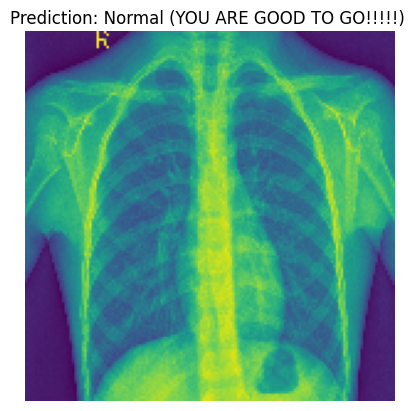

In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

result = "Pneumonia Detected (PLEASE TAKE AN APPOINTMENT WITH THE DOC)" if predicted_class == 0 else "Normal (YOU ARE GOOD TO GO!!!!!) "

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {result}")
plt.show()